In [20]:
# import necessary functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
from hybridstablemodel.model.statespace import ContinuousNonlinear, ContinuousLinear
from hybridstablemodel.simulator import Simulator
from hybridstablemodel.system.cartpole import CartPole
from hybridstablemodel.plot.plot_simulation_results import plot_states, plot_outputs, plot_inputs, plot_comparison
import matplotlib.pyplot as plt
import numpy as np

In [91]:
system = CartPole(mu_c=0, mu_p=0.01)
x_bar = np.array([[0], [0], [np.pi], [0]])
A, B = system.get_linearization(x_bar=x_bar)
print(f'A_lin: \n{A} \n B_lin: \n{B}')

A_lin: 
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -7.17804878e-01 -1.46341463e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.57917073e+01 -3.21951220e-01]] 
 B_lin: 
[[0.        ]
 [0.97560976]
 [0.        ]
 [1.46341463]]


In [92]:
nl_model = ContinuousNonlinear(
    f=system.state_dynamics, g=system.output_function, nx=4, nu=1, ny=1
)

In [123]:
lin_model = ContinuousLinear(
    A=A,
    B=B,
    C=np.array([[0, 0, 1, 0]]),
    D = np.array([[0]]),
    x_bar=x_bar
)
lin_model.output_layer([np.array([[0],[0], [np.pi+0.1], [0]])], [np.array([[0]])])

[array([[3.24159265]])]

In [140]:
T_end = 10.0
step_size = 0.02
N = int(T_end/step_size)
x0 = np.array([[0], [0], [np.pi+1], [0]])
us = [np.array([[u]]) for u in np.zeros(N)]

sim = Simulator(T=T_end, step_size=step_size)
lin_res, t, _ = sim.simulate(
    model=lin_model,
    initial_state=x0,
    input=us,
    name = 'lin'
)
nl_res, t, _ = sim.simulate(
    model=nl_model,
    initial_state=x0,
    input=us,
    name='non lin'
)

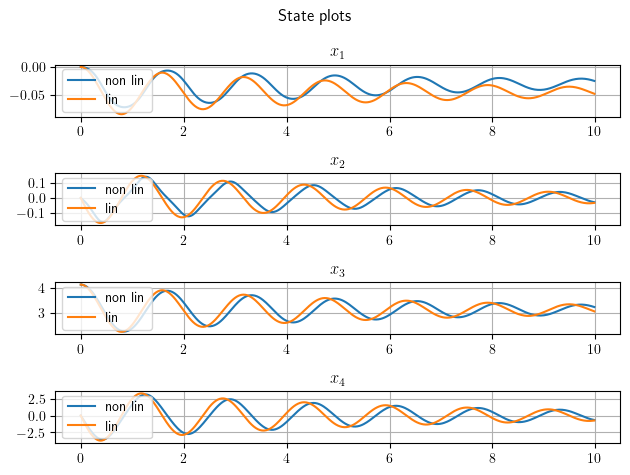

In [141]:
plot_comparison(results=[nl_res, lin_res], t=t)